In [124]:
import pandas as pd
import numpy as np

import scipy
import math

import itertools
from scipy import stats

import matplotlib.pyplot as plt

from statsmodels.stats.proportion import proportion_confint

In [38]:
data = pd.read_csv('churn_analysis.csv')

In [39]:
data.head()

,Unnamed: 0,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,...,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,treatment,mes_estim,churn
0,0,KS,128,415,no,yes,25,265.1,110,45.07,...,244.7,91,11.01,10.0,3,2.70,1,1,0.65,False.
1,1,OH,107,415,no,yes,26,161.6,123,27.47,...,254.4,103,11.45,13.7,3,3.70,1,0,0.55,False.
2,2,NJ,137,415,no,no,0,243.4,114,41.38,...,162.6,104,7.32,12.2,5,3.29,0,0,0.72,False.
3,3,OH,84,408,yes,no,0,299.4,71,50.90,...,196.9,89,8.86,6.6,7,1.78,2,1,0.28,False.
4,4,OK,75,415,yes,no,0,166.7,113,28.34,...,186.9,121,8.41,10.1,3,2.73,3,2,0.45,False.


In [40]:
treatment = data[data.treatment == 1]
noTreatment = data[data.treatment != 1]

In [41]:
print(len(data), len(treatment + noTreatment))

3333 3333


In [42]:
len(treatment.state.unique())

51

In [43]:
treatment.churn.unique()

array(['False.', 'True.'], dtype=object)

Давайте рассмотрим всех пользователей из контрольной группы (treatment = 1). Для таких пользователей мы хотим проверить гипотезу о том, что штат абонента не влияет на то, перестанет ли абонент пользоваться услугами оператора.

Для этого мы воспользуемся критерием хи-квадрат. Постройте таблицы сопряженности между каждой из всех 1275 возможных неупорядоченных пар штатов и значением признака churn. Для каждой такой таблицы 2x2 применить критерий хи-квадрат можно с помощью функции



Заметьте, что, например, (AZ, HI) и (HI, AZ) — это одна и та же пара. Обязательно выставьте correction=False (о том, что это значит, вы узнаете из следующих вопросов).

Сколько достигаемых уровней значимости оказались меньше, чем α=0.05α=0.05?

In [44]:
# код из задания:
# scipy.stats.chi2_contingency(subtable, correction = False)

In [45]:
treatment.state.unique()

array(['KS', 'OH', 'LA', 'IA', 'VT', 'CO', 'WY', 'MO', 'GA', 'AK', 'MA',
       'NJ', 'AR', 'MI', 'IN', 'MN', 'SD', 'TX', 'DC', 'NY', 'OR', 'AZ',
       'MS', 'UT', 'ME', 'ID', 'FL', 'NV', 'WA', 'WV', 'NH', 'VA', 'NM',
       'KY', 'MT', 'PA', 'RI', 'DE', 'OK', 'NE', 'CT', 'WI', 'CA', 'NC',
       'MD', 'TN', 'AL', 'IL', 'ND', 'HI', 'SC'], dtype=object)

In [46]:
state_combi = list(itertools.combinations(treatment.state.unique(), 2))

In [47]:
len(state_combi)

1275

In [48]:
state_combi[:10]

[('KS', 'OH'),
 ('KS', 'LA'),
 ('KS', 'IA'),
 ('KS', 'VT'),
 ('KS', 'CO'),
 ('KS', 'WY'),
 ('KS', 'MO'),
 ('KS', 'GA'),
 ('KS', 'AK'),
 ('KS', 'MA')]

In [49]:
len(treatment.churn[treatment.state == 'KS'])

25

In [54]:
tr = []
for i in np.arange(0, len(state_combi), 1):
    t = pd.crosstab(treatment['state'].where(treatment['state'].isin(state_combi[i])), 
                treatment['churn'])
    tr.append(stats.chi2_contingency(t, correction = False)[1])

In [55]:
stats.chi2_contingency(tr, correction = False)[1]

1.0

In [56]:
dtr = []
for i in tr:
    if i < 0.05:
        dtr.append(i)

In [57]:
len(dtr)

34

In [58]:
tr

[0.07552398753331192,
 0.024051580332536272,
 0.2821902324706389,
 0.6167690999347494,
 0.6791249326068319,
 0.10018710484992144,
 0.4783036859137494,
 0.1156180650795173,
 0.044934001242598755,
 0.9279935044417454,
 0.3418681850357756,
 0.8234512442969397,
 0.6791249326068319,
 0.2024306583692768,
 0.1156180650795173,
 0.20243065836927682,
 0.8830632707719543,
 0.052757652502719445,
 0.37456149180937925,
 0.2613268489836295,
 0.1546436045787496,
 0.3418681850357756,
 0.4276282765184104,
 0.9632296531731099,
 0.1792671301924829,
 0.13361440253771584,
 0.8120531453899645,
 0.852914797545359,
 0.2554613649566434,
 0.45194583973362634,
 0.20243065836927682,
 0.03799818419787574,
 0.3057487934246431,
 0.2735146430204451,
 0.668373908412732,
 0.4276282765184104,
 0.0731755545397953,
 0.3855103123401462,
 0.17837448691983818,
 0.3109093724600651,
 0.07552398753331192,
 0.7215797250891101,
 0.338393599542998,
 0.5597750584844132,
 0.17372157772237434,
 0.3109093724600651,
 0.17372157772237434

В основе критерия xи-квадрат лежит предположение о том, что если верна нулевая гипотеза, то дискретное биномиальное распределение данных по клеткам в таблице сопряженности может быть аппроксимировано с помощью непрерывного распределения xи-квадрат. Однако точность такой аппроксимации существенно зависит от суммарного количества наблюдений и их распределения в этой таблице (отсюда и ограничения при использовании критерия xи-квадрат).

Такая поправка, как несложно догадаться по формуле, как правило, уменьшает значение статистики \chi^{2} χ 
2
 , то есть увеличивает достигаемый уровень значимости.

Эта поправка обычно используется для таблиц сопряженности размером 2x2 и для небольшого количества наблюдений. Такая поправка, однако, не является серебрянной пулей, и часто критикуется за то, что статистический критерий при ее использовании становится слишком консервативным, то есть часто не отвергает нулевую гипотезу там, где она неверна (совершает ошибку II рода).

Полезно знать, что эта поправка часто включена по умолчанию (например, в функции scipy.stats.chi2_contingency) и понимать ее влияние на оценку достигаемого уровня значимости.

Проведите те же самые сравнения, что и в вопросе №1, только с включенной коррекцией

In [59]:
tr = []
for i in np.arange(0, len(state_combi), 1):
    t = pd.crosstab(treatment['state'].where(treatment['state'].isin(state_combi[i])), 
                treatment['churn'])
    tr.append(stats.chi2_contingency(t, correction = True)[1])

In [60]:
dtr = []
for i in tr:
    if i < 0.05:
        dtr.append(i)

In [61]:
len(dtr)

0

In [62]:
dtr

[]

In [63]:
tr

[0.15905416117625149,
 0.06777015784841939,
 0.49375215860364086,
 0.8675183451970201,
 0.9374682797593001,
 0.20320320163459535,
 0.7173074469574412,
 0.23000239762884186,
 0.10675841563357981,
 0.8212605088753827,
 0.543168948299033,
 0.897582130883392,
 0.9374682797593001,
 0.3581275855474787,
 0.23000239762884186,
 0.3581275855474787,
 0.8541241664156148,
 0.12298959727002609,
 0.5686442463151542,
 0.4446043558979127,
 0.2955361159426749,
 0.543168948299033,
 0.6541220638956611,
 0.7953892742679373,
 0.33550582441831434,
 0.26058903427361446,
 0.9315742579435451,
 0.894644948959558,
 0.41804773791982386,
 0.7316712103894272,
 0.3581275855474787,
 0.08750282219590563,
 0.4947403445331602,
 0.4505581435309819,
 0.9408967364143512,
 0.6541220638956611,
 0.16408805702136933,
 0.6414714682107963,
 0.32156632629148724,
 0.4930421534266214,
 0.15905416117625149,
 1.0,
 0.5523692684354513,
 0.8018905324757203,
 0.3504099583893704,
 0.4930421534266214,
 0.3504099583893706,
 0.32156632629148

Что если у нас мало данных, мы не хотим использовать аппроксимацию дискретного распределения непрерывным и использовать сомнительную поправку, предположения критерия xи-квадрат не выполняются, а проверить гипотезу о том, что данные принадлежат одному распределению, нужно ?

В таком случае прибегают к так называемому точному критерию Фишера. Этот критерий не использует приближений и в точности вычисляет значение достигаемого уровня значимости используя комбинаторный подход.

В числителе этой дроби стоит суммарное количество способов выбрать a и c из a +b и c + d соответственно. А в знаменателе — количество способов выбрать число объектов, равное сумме элементов первого столбца a + c из общего количества рассматриваемых объектов n.


Понятно, что такой критерий вычислительно неудобен в силу большого количества факториалов в формуле выше. То есть даже при небольших выборках для вычисления значения этого критерия приходится оперировать очень большими числами. Поэтому данным критерием пользуются обычно только для таблиц 2x2, но сам критерий никак не ограничен количеством строк и столбцов, и его можно построить для любой таблицы n\times m n×m.

Посчитайте для каждой пары штатов, как и в первом задании, достигаемый уровень значимости с помощью точного критерия Фишера и сравните получившиеся значения с двумя другими подходами, описанными выше.


In [64]:
tr = []
for i in np.arange(0, len(state_combi), 1):
    t = pd.crosstab(treatment['state'].where(treatment['state'].isin(state_combi[i])), 
                treatment['churn'])
    tr.append(stats.fisher_exact(t)[1])

In [65]:
dtr = []
for i in tr:
    if i < 0.05:
        dtr.append(i)

In [66]:
len(dtr)

10

Давайте попробуем применить полученные знания о разных видах корреляции и ее применимости на практике.

Рассмотрим пару признаков day_calls и mes_estim. Посчитайте корреляцию Пирсона между этими признаками на всех данных, ее значимость.

In [67]:
print(stats.pearsonr(data.day_calls.values, data.mes_estim.values))

(-0.051794350587572625, 0.0027798836869756707)


Еще раз рассмотрим пару признаков day_calls и mes_estim. Посчитайте корреляцию Спирмена между этими признаками на всех данных, ее значимость.

In [68]:
print(stats.spearmanr(data.day_calls.values, data.mes_estim.values))

SpearmanrResult(correlation=0.043349880533927444, pvalue=0.012317367189170541)


In [69]:
data.day_calls.values

array([110, 123, 114, ..., 109, 105, 113], dtype=int64)

In [70]:
data.mes_estim.values

array([0.65, 0.55, 0.72, ..., 0.47, 0.32, 0.45])

((array([-3.5297919 , -3.28786833, -3.15418238, ...,  3.15418238,
          3.28786833,  3.5297919 ]),
  array([  0,   0,  30, ..., 160, 163, 165], dtype=int64)),
 (20.06326629015901, 100.43564356435644, 0.998901696930286))

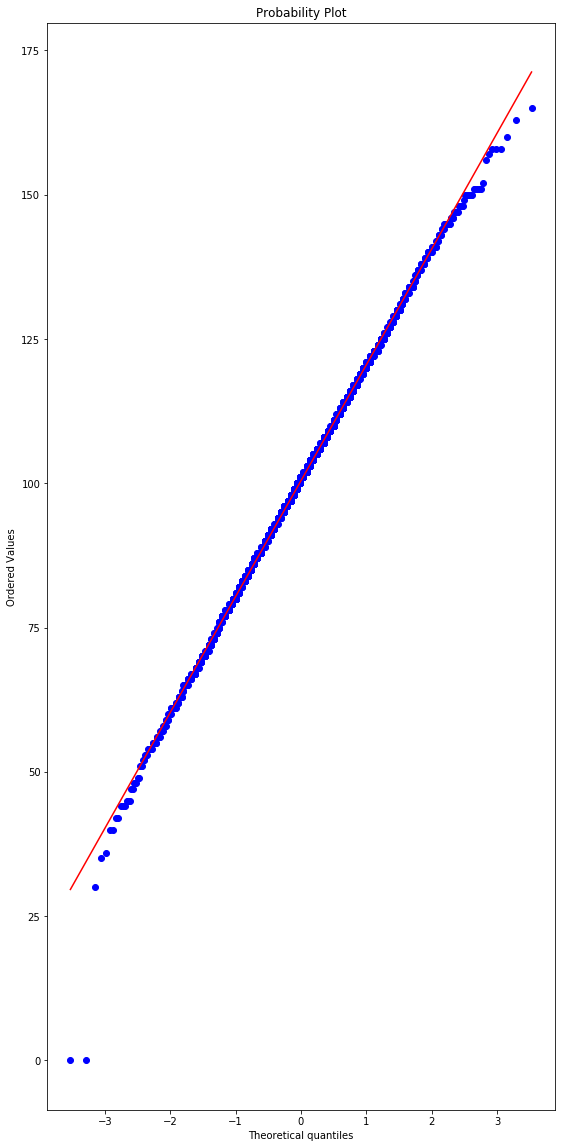

In [71]:
plt.figure(figsize=(20,20))
plt.subplot(121)
stats.probplot(data.day_calls.values, plot=plt)

((array([-3.5297919 , -3.28786833, -3.15418238, ...,  3.15418238,
          3.28786833,  3.5297919 ]),
  array([0.05, 0.05, 0.05, ..., 0.89, 0.91, 0.96])),
 (0.13861708020693375, 0.4842364236423642, 0.9996050483985336))

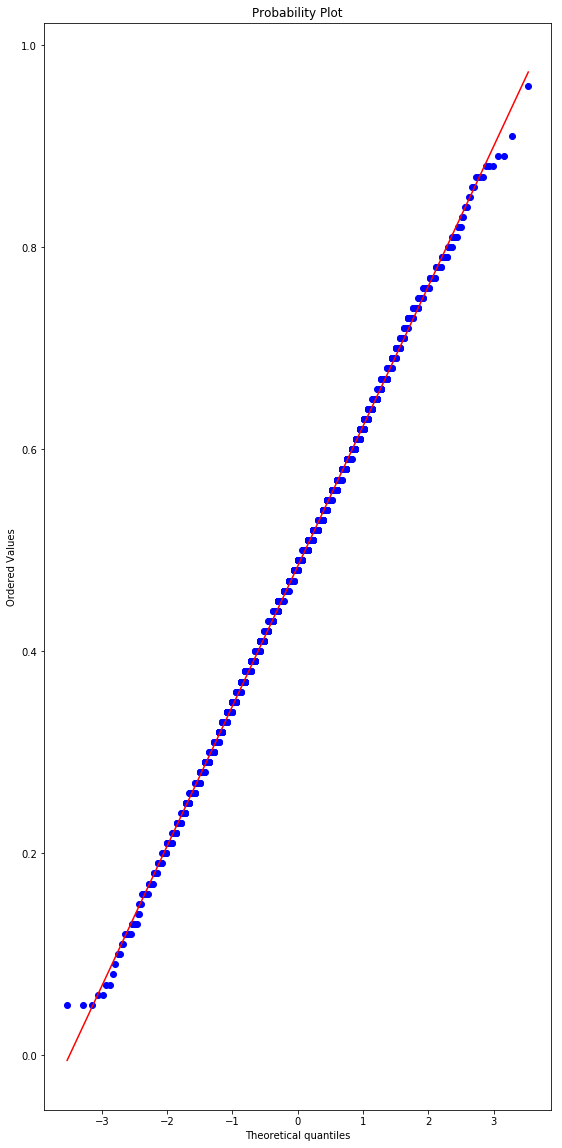

In [72]:
plt.figure(figsize=(20,20))
plt.subplot(121)
stats.probplot(data.mes_estim.values, plot=plt)

https://habr.com/ru/company/ods/blog/322626/

В этой части задания вам нужно будет самостоятельно решить, с помощью каких методов можно провести анализ эффективности удержания (churn) с помощью раличных методов (treatment = 0, treatment = 2) относительно контрольной группы пользователей (treatment = 1).

Что можно сказать об этих двух методах (treatment = 0, treatment = 2)? Одинаковы ли они с точки зрения эффективности? Каким бы методом вы бы посоветовали воспользоваться компании?

Не забудьте про поправку на множественную проверку! И не пользуйтесь односторонними альтернативами, поскольку вы не знаете, к каким действительно последствиям приводят тестируемые методы (treatment = 0, treatment = 2) !

In [73]:
data.treatment.unique()

array([1, 0, 2], dtype=int64)

In [74]:
data.churn.unique()

array(['False.', 'True.'], dtype=object)

In [75]:
cntrlStrat = data[data.treatment == 1]

In [76]:
leftStrat = data[data.treatment == 0]

In [77]:
rightStrat = data[data.treatment == 2]

In [80]:
print(
len(cntrlStrat), 
len(leftStrat),
len(rightStrat)
)

1097 1133 1103


In [79]:
print
(
len(cntrlStrat[cntrlStrat.churn == 'True.']),
len(leftStrat[leftStrat.churn == 'True.']),
len(rightStrat[rightStrat.churn == 'True.']),
)

(180, 165, 138)

In [81]:
cntrlStrat.churn.values

array(['False.', 'False.', 'False.', ..., 'True.', 'False.', 'False.'],
      dtype=object)

In [82]:
proCntl = 100 / ( len(cntrlStrat) 
                 / len(cntrlStrat[cntrlStrat.churn == 'True.']) )

In [83]:
proCntl

16.408386508659984

In [84]:
proLeft = 100 / ( len(leftStrat) 
                 / len(leftStrat[leftStrat.churn == 'True.']) )

In [85]:
proLeft

14.563106796116505

In [86]:
proRight = 100 / ( len(rightStrat) 
                 / len(rightStrat[rightStrat.churn == 'True.']) )

In [87]:
proRight

12.511332728921124

In [88]:
a = [len(cntrlStrat[cntrlStrat.churn == 'True.']), 
     len(cntrlStrat[cntrlStrat.churn == 'False.'])]

In [89]:
a

[180, 917]

In [90]:
b = [len(leftStrat[leftStrat.churn == 'True.']), 
     len(leftStrat[leftStrat.churn == 'False.'])]

In [91]:
b

[165, 968]

In [92]:
c = [len(rightStrat[rightStrat.churn == 'True.']), 
     len(rightStrat[rightStrat.churn == 'False.'])]

In [93]:
c

[138, 965]

In [94]:
tabel = [a,b,c]

In [98]:
tabel

[[180, 917], [165, 968], [138, 965]]

In [99]:
#bootstrap

In [105]:
q = {'False.': 0, 'True.': 1}
cntrlStrat.churn = cntrlStrat.churn.map(q)
leftStrat.churn = leftStrat.churn.map(q)
rightStrat.churn = rightStrat.churn.map(q)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [106]:
cntrlStrat.head()

,Unnamed: 0,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,...,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,treatment,mes_estim,churn
0,0,KS,128,415,no,yes,25,265.1,110,45.07,...,244.7,91,11.01,10.0,3,2.70,1,1,0.65,0
3,3,OH,84,408,yes,no,0,299.4,71,50.90,...,196.9,89,8.86,6.6,7,1.78,2,1,0.28,0
8,8,LA,117,408,no,no,0,184.5,97,31.37,...,215.8,90,9.71,8.7,4,2.35,1,1,0.50,0
12,12,IA,168,408,no,no,0,128.8,96,21.90,...,141.1,128,6.35,11.2,2,3.02,1,1,0.37,0
17,17,VT,93,510,no,no,0,190.7,114,32.42,...,129.6,121,5.83,8.1,3,2.19,3,1,0.84,0


In [113]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [114]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [120]:
np.random.seed(0)

cntrl_scores = list(map(np.mean, get_bootstrap_samples(cntrlStrat.churn.values, 1000)))
left_scores = list(map(np.mean, get_bootstrap_samples(leftStrat.churn.values, 1000)))

cntrl_intervals = stat_intervals(cntrl_scores, 0.05)
left_intervals = stat_intervals(left_scores, 0.05)

print ("95% confidence interval for ctrl mean:", cntrl_intervals)
print ("95% confidence interval for left mean:",  left_intervals)

95% confidence interval for ctrl mean: [0.1430948  0.18689608]
95% confidence interval for left mean: [0.12621359 0.16593116]


In [121]:
np.random.seed(0)

cntrl_scores = list(map(np.mean, get_bootstrap_samples(cntrlStrat.churn.values, 1000)))
right_scores = list(map(np.mean, get_bootstrap_samples(rightStrat.churn.values, 1000)))

cntrl_intervals = stat_intervals(cntrl_scores, 0.05)
right_intervals = stat_intervals(right_scores, 0.05)

print ("95% confidence interval for ctrl mean:", cntrl_intervals)
print ("95% confidence interval for right mean:",  right_intervals)

95% confidence interval for ctrl mean: [0.1430948  0.18689608]
95% confidence interval for right mean: [0.10516772 0.14505893]


In [122]:
np.random.seed(0)

left_scores = list(map(np.mean, get_bootstrap_samples(leftStrat.churn.values, 1000)))
right_scores = list(map(np.mean, get_bootstrap_samples(rightStrat.churn.values, 1000)))

left_intervals = stat_intervals(left_scores, 0.05)
right_intervals = stat_intervals(right_scores, 0.05)

print ("95% confidence interval for left mean:", left_intervals)
print ("95% confidence interval for right mean:",  right_intervals)

95% confidence interval for left mean: [0.12621359 0.16769638]
95% confidence interval for right mean: [0.10607434 0.14324569]


Доверительные интервалы для двух долей

Интервальные оценки долей

In [129]:
conf_interval_left = proportion_confint(sum(leftStrat.churn.values), 
                                            leftStrat.shape[0],
                                            method = 'wilson')
conf_interval_right = proportion_confint(sum(rightStrat.churn.values), 
                                            rightStrat.shape[0],
                                            method = 'wilson')

In [130]:
print
(
    conf_interval_left,
    conf_interval_right
)

((0.1262891297794312, 0.16736787598019826),
 (0.1068800961786988, 0.14594875893019524))

In [131]:
def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

In [132]:
def proportions_diff_z_test(z_stat, alternative='two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - stats.norm.cdf(z_stat)

In [133]:
print
('p-value two-sided: %.13f'
      % proportions_diff_z_test(proportions_diff_z_stat_ind(leftStrat.churn.values, 
                                                            rightStrat.churn.values))
)

'p-value two-sided: 0.1564246886051'

In [134]:
print
('p-value greater: %.13f'
      % proportions_diff_z_test(proportions_diff_z_stat_ind(leftStrat.churn.values, 
                                                            rightStrat.churn.values), 'greater')
)

'p-value greater: 0.0782123443025'

In [135]:
print
('p-value two-sided: %.13f'
      % proportions_diff_z_test(proportions_diff_z_stat_ind(cntrlStrat.churn.values, 
                                                            rightStrat.churn.values))
)

'p-value two-sided: 0.0093480842945'

In [136]:
print
('p-value greater: %.13f'
      % proportions_diff_z_test(proportions_diff_z_stat_ind(cntrlStrat.churn.values, 
                                                            rightStrat.churn.values), 'greater')
)

'p-value greater: 0.0046740421472'

In [138]:
print
('p-value two-sided: %.13f'
      % proportions_diff_z_test(proportions_diff_z_stat_ind(cntrlStrat.churn.values, 
                                                            leftStrat.churn.values))
)

'p-value two-sided: 0.2283311639045'

In [137]:
print
('p-value greater: %.13f'
      % proportions_diff_z_test(proportions_diff_z_stat_ind(cntrlStrat.churn.values, 
                                                            leftStrat.churn.values), 'greater')
)

'p-value greater: 0.1141655819523'